<a href="https://colab.research.google.com/github/Ankit-LASA/Data-Science/blob/main/AnkiBhasU9proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [159]:
!pip install preliz
import preliz as pz

# Unit 9 Project: Varanus Salvador---Data Science Final

## Introduction

The varanus salvator, or the Asian Water Monitor, has gained an immense amount of importance among archeologists and conservationists worldwide. As the second largest lizard, it is seen as an essential species to maintain amidst the coming biodiversity crisis with rising global temperatures.

Additionally, it serves a key role to analyze the fossils of past reptilian ancestors. The varanus salvator, alongside other monitor lizards, evolved from a common ancestor fourty million years ago. With such a long line of historical data, the Asian Water Monitor is particularly crucial for archeologists estimates of the makeup of past species. Because we can only glean surface-level understandings of their ancestors through fossils, it's useful to use the varanus salvator as an estimate for what past ancestors may have looked like.

To investigate such predictors, I found a dataset collecting a litany of physical characteristics over the varanus salvator. It collects numerous variables such as body size, eye to ear length, skull length, tail and thigh width, sex, and weight. By using PyTorch, I'm going to observe if such variables can serve as predictors by 'training' it over one part of the data and iterating it over other datapoints. Particularly, I'm going to see if it can test for the weight as other variables can be directly measured by the skeletal remains (whereas on the other hand, the weight can't as the fossil has already eroded).

## Model

In [160]:
#importing to get a better look at the data
#drop the incomplete rows from the data
url = "https://raw.githubusercontent.com/Ankit-LASA/Data-Science/refs/heads/main/Unit9/Varanus%20salvator%20morphology%20sex%20prediction%20(19%20Features).csv"
data = pd.read_csv(url).dropna()

In [161]:
data

,BODY CONDITION,BASE TAIL CIRCUMFERENCE (BTC),BTC:STL,BODYSIZE,EYE TO EAR LENGTH (EEL),EEL: SKULL LENGTH,EEL:STL,SKULL LENGTH (SL),SL:STL,SKULL WIDTH (SW),SW:STL,SW:SL,SNOUT-TAIL-LENGTH (STL),SNOUT-VENT-LENGTH (SVL),TAIL LENGTH (TL),TL:STL,THIGH WIDTH (TW),TW:STL,WEIGHT,"SEX (male= 0, female= 1)"
0,0.014000,15.2,0.121600,-1.69810,2.8,0.314607,0.022400,8.9,0.071200,14.6,0.116800,1.640449,125.0,48.4,76.6,0.612800,12.1,0.096800,1.75,1
1,0.015163,15.3,0.113166,-1.23819,3.1,0.336957,0.022929,9.2,0.068047,15.0,0.110947,1.630435,135.2,54.1,81.1,0.599852,12.0,0.088757,2.05,1
2,0.021537,16.6,0.110007,-0.44322,3.2,0.359551,0.021206,8.9,0.058979,16.5,0.109344,1.853933,150.9,59.2,91.7,0.607687,14.0,0.092777,3.25,1
3,0.026382,21.4,0.134422,0.84304,3.6,0.349515,0.022613,10.3,0.064698,18.4,0.115578,1.786408,159.2,61.7,97.5,0.612437,16.0,0.100503,4.20,0
4,0.015351,14.0,0.122807,-2.00135,2.9,0.325843,0.025439,8.9,0.078070,13.8,0.121053,1.550562,114.0,48.3,65.7,0.576316,11.0,0.096491,1.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.022015,18.0,0.134328,-0.48835,3.2,0.326531,0.023881,9.8,0.073134,15.8,0.117910,1.612245,134.0,54.2,79.8,0.595522,15.0,0.111940,2.95,1
142,0.021900,17.6,0.118598,-0.28069,3.1,0.313131,0.020889,9.9,0.066712,16.0,0.107817,1.616162,148.4,57.3,91.1,0.613881,14.9,0.100404,3.25,1
143,0.027153,19.0,0.147401,0.61795,4.0,0.357143,0.031032,11.2,0.086889,18.0,0.139643,1.607143,128.9,61.0,67.9,0.526765,16.3,0.126455,3.50,1
144,0.022487,18.3,0.121032,-0.09299,3.2,0.333333,0.021164,9.6,0.063492,16.4,0.108466,1.708333,151.2,59.4,91.8,0.607143,15.3,0.101190,3.40,1


Because nueral networks don't explain the relationship between individual variables (even it makes good predictions), it's useful to use a pairplot to identify which variables don't show any correlation.

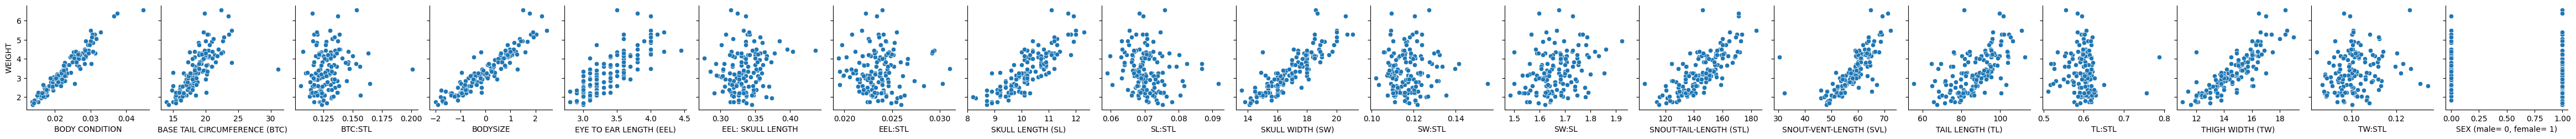

In [162]:
#scatterplot list of each variable
sns.pairplot(data, y_vars=['WEIGHT'], x_vars=data.columns.drop('WEIGHT'), kind='scatter')

These are a LOT of variables, so we need to ask which predictor we ought to keep/remove.

As the ratio predictors aren't used to demonstrate physical characteristics but rather the scope of the difference between other variables, it can be removed. Additionally, if there is a trend, the independent variables alone should be able to capture it. As such, I'll remove "EEL: Skull Length", "EEL:STL", "SL:STL", "SW:STL", "SW:SL", "TL:STL", and "TW:STL".

Furthermore, I'll remove "gender" because as a boolean it doesn't function well as a predictor. This is because as it solely has two values (male/female) with a MASSIVE amount of variance.

Some variables can't be used in the situation presented above. Because we're attempting to predict with measurable values from fossils, we can't use "body condition" as a variable since it uses mussle mass and body fat percentage within its calculation.

Lastly, the remainder of the variables are measurements of various lengths of the varanus salvator. However, because I strongly lack any prior knowledge over which particular body part would have the highest correlation, I can't arbritrarily exclude any one variable. As such, it's best to use a variable that combines all of the above measurements into one which allows me to elimininate "Eye to Ear Length (EEL)", "Skull Length (SL)", "Skull Width (SW)", "Snout-Tail-Length (STL)", "Snout-Vent-Length (SVL)", "Tail Length (TL)", and finally, "Thigh Width (TW).

That leaves us with a final predictor variable of "BODYSIZE".

In [163]:
h = data.BODYSIZE.to_numpy()
bodySize = torch.from_numpy(h)
w = data.WEIGHT.to_numpy()
weight = torch.from_numpy(w)

In [164]:
X = bodySize.unsqueeze(dim=1) #use bodySize as a predictor
y = weight.unsqueeze(dim=1) #weight is the estimand, the thing we're predicting.

In [165]:
# Scale the bodySize using standardization
scaler = StandardScaler()
bodySize_scaled = scaler.fit_transform(
    bodySize.reshape(-1, 1) #makes it a column vector
    )
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    bodySize_scaled, weight, test_size=0.2,
)
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-165-bd9573d47138>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-165-bd9573d47138>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32)


In [166]:
# Two layer nn with nn.Sequential
model_1 = nn.Sequential(
    #our input is a vector, so 1 diminsion.
    nn.Linear(in_features=1, out_features=32,),
    nn.RReLU(),
    #hidden layer with 32 nodes
    nn.Linear(in_features=32, out_features=16, ),
    nn.RReLU(),
    #moves to hidden layer with 16 nodes
    nn.Linear(in_features=16, out_features=8, ),
    nn.RReLU(),
    #hidden layer with 8 nodes
    nn.Linear(in_features=8, out_features=4, ),
    nn.RReLU(),
    #hidden layer with 4 nodes
    nn.Linear(in_features=4, out_features=1, ),
    #outputs a vector of predicted weights
)

In [167]:
# Create a loss function
loss_fn = nn.MSELoss()
# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [168]:
# Set the number of epochs; this is how many times we update our model
epochs = 10000
for epoch in range(epochs):
    ### Training
    #this allows our matrices to update
    model_1.train()
    # 1. Forward pass; makes predictions
    y_pred = model_1(X_train)
    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)
    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()
    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()
    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()
    ### Testing
    model_1.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_1(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)
    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([30])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train loss: 15.12930, Test loss: 12.22963
Epoch: 200 | Train loss: 13.41131, Test loss: 10.70483
Epoch: 400 | Train loss: 11.62050, Test loss: 9.18036
Epoch: 600 | Train loss: 9.71886, Test loss: 7.59589
Epoch: 800 | Train loss: 7.51307, Test loss: 5.85153
Epoch: 1000 | Train loss: 4.96871, Test loss: 3.93714
Epoch: 1200 | Train loss: 2.32403, Test loss: 2.14228
Epoch: 1400 | Train loss: 0.71198, Test loss: 1.22247
Epoch: 1600 | Train loss: 0.27735, Test loss: 1.10968
Epoch: 1800 | Train loss: 0.20025, Test loss: 1.16174
Epoch: 2000 | Train loss: 0.19940, Test loss: 1.19340
Epoch: 2200 | Train loss: 0.20515, Test loss: 1.20845
Epoch: 2400 | Train loss: 0.19488, Test loss: 1.21738
Epoch: 2600 | Train loss: 0.19012, Test loss: 1.22411
Epoch: 2800 | Train loss: 0.19396, Test loss: 1.22931
Epoch: 3000 | Train loss: 0.18335, Test loss: 1.23395
Epoch: 3200 | Train loss: 0.18735, Test loss: 1.23772
Epoch: 3400 | Train loss: 0.18043, Test loss: 1.24137
Epoch: 3600 | Train loss: 0.18

I'm using a particularly high number of epochs because there's a large amount of learning/test loss. As such, a higher amount of testing reduces the overall variance, simplifying the model.

In [169]:
# Turn on evaluation mode
model_1.eval()
# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_1(X_test)

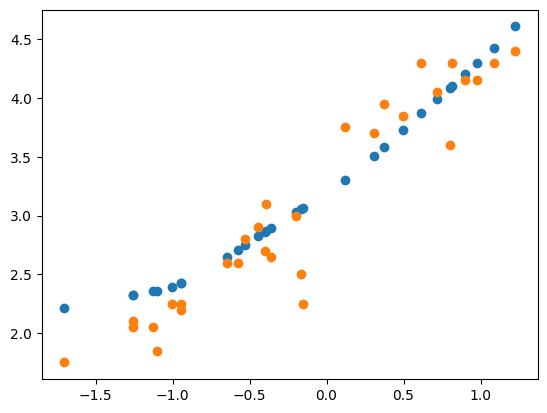

In [170]:
#plots predictions--remember, our model has never seen X_test
plt.scatter(X_test.detach().numpy(),y_preds.detach().numpy())
#plots test data
plt.scatter(X_test.detach().numpy(),y_test.detach().numpy())

As the scatterplot shows, the model is suprisingly accurate in predicting the body weight. The training has made the predictor far more accurate, and it doesn't seem to be 'overfitting' to the training data when predicting over the test data.


## Conclusion

After looking at the model of various physical characteristics, the body size is sufficiently accurate at predicting the weight of the varanus salvator. Even if individual lengths have a stronger correlation, the body size is an accurate enough predictor such that it can model the training data, and therefore, somewhat predictably model the weight from the fossilized remains of its common ancestor.


However, there's some reasons to be skeptical of the dataset (or to improve upon it). It's possible that the correlation to common ancestors can be broken as evolutionary mutations change its physical composition. Additionally, the dataset is extremely small for such calculations with around than 145 data points. Lastly, there's a chance the model can be improved with some prior knowledge. With expertise, one may know that one particular body part has a stronger link to body weight, and as such, give it more weight in calculations. This would improve the model by strengthening the tie in between them (especially since the main problem with neural networks is its simplistic method).


Thus, using the above training dataset can be used by scientists and anthropologists alike to get a better idea of what the Asian Monitor's common ancestor looked like.
